# 制約付き最適化のアルゴリズムの適用例

In [1]:
# 必要なライブラリのインポート
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib 
from scipy import optimize
import cvxpy  as cp

## 外点ペナルティ
例題3.3に等式制約を１本追加

$$
\begin{array}{|ll}
\text{目的関数} &f(x_1,x_2) = (x_1-2)^2+(x_2-4)^2\quad\to\text{最小化}\\
\text{制約条件} &g_1(x_1,x_2)  = -x_1+x_2\le 0,\\
&g_1(x_1,x_2)  = (x_1-1)^3+x_2-3\le 0,\\
&g_1(x_1,x_2)  =  (x_1-1)^2-x_1\le 0,\\
& h_1(x_1,x_2) = x_1+x_2 - 2.
\end{array}
$$

iter =  1 , f(x) =  4.444444526179167 , P(x) =  2.222222140487501 , 
 g(x) =  [ 0.66666666 -0.96296298 -1.55555552] , h(x) =  [1.3333333] , x =  [1.33333332 1.99999998]
iter =  2 , f(x) =  8.26446287487078 , P(x) =  0.16528924320768024 , 
 g(x) =  [ 0.18181806 -1.72652145 -0.4462811 ] , h(x) =  [0.36363641] , x =  [1.09090917 1.27272723]
iter =  3 , f(x) =  9.611687867856665 , P(x) =  0.0076893480308316995 , 
 g(x) =  [ 0.03921569 -1.94116894 -0.09765473] , h(x) =  [0.07843136] , x =  [1.01960784 1.05882352]
iter =  4 , f(x) =  9.920477511324753 , P(x) =  0.00031745480980058564 , 
 g(x) =  [ 0.00796813 -1.98804775 -0.01990442] , h(x) =  [0.01593624] , x =  [1.00398406 1.01195218]
iter =  5 , f(x) =  9.984019239194941 , P(x) =  1.2779449102864825e-05 , 
 g(x) =  [ 1.59872100e-03 -1.99760193e+00 -3.99614123e-03] , h(x) =  [0.00319743] , x =  [1.00079935 1.00239807]
iter =  6 , f(x) =  9.996800827494013 , P(x) =  5.118171090334194e-07 , 
 g(x) =  [ 3.19948807e-04 -1.99952008e+00 -7.998240

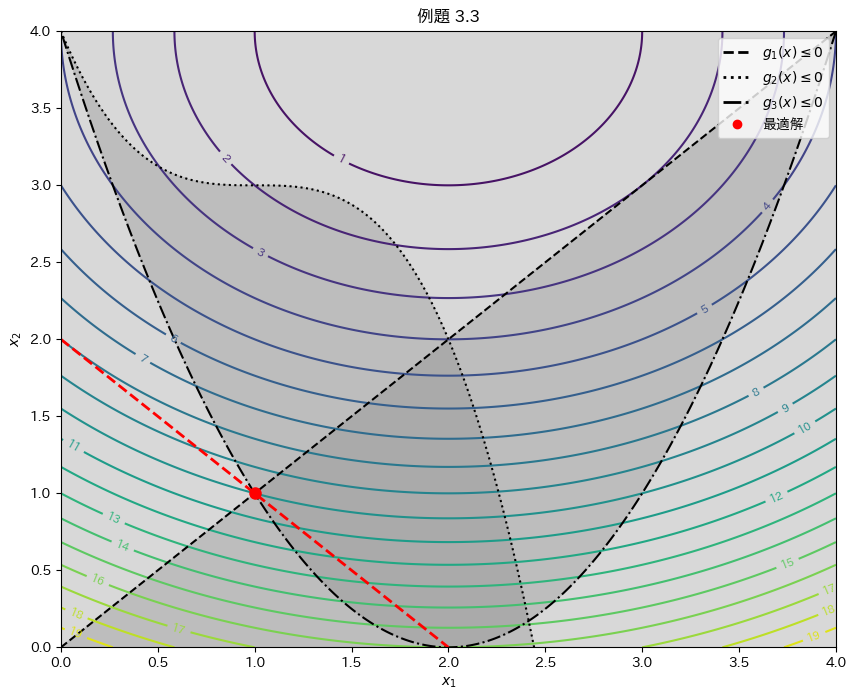

In [2]:
# 目的関数
def f_obj(x):# f(x) 
    return (x[0] - 2)**2 + (x[1] - 4)**2
# 制約条件
def g_ineq(x): # g(x) = [g1(x), g2(x), g3(x)]<= 0
    g1 = -x[0] + x[1]  # g1(x) <= 0
    g2 = (x[0] - 1)**3 + x[1] - 3  # g2(x) <= 0
    g3 = (x[0] - 2)**2 - x[1]  # g3(x) <= 0
    return np.array([g1, g2, g3])
def h_eq(x):# h(x) = [h1(x)] =  0
    h1 = x[0] + x[1] - 2
    return np.array([h1])
    
# グリッドの作成
x1 = np.linspace(0, 4, 500)
x2 = np.linspace(0, 4, 500)
x1_grid, x2_grid = np.meshgrid(x1, x2)

# 目的関数の値
f_values = f_obj([x1_grid, x2_grid])

# 制約条件の値
g_values = [g_ineq([x1_grid, x2_grid])[i] for i in range(3)]
h_values = h_eq([x1_grid, x2_grid])[0]

# プロット
plt.figure(figsize=(10, 8))

# 等高線プロット（目的関数）
contours = plt.contour(x1_grid, x2_grid, f_values, levels=20, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)

# 制約条件の領域
linestyles = ["dashed", "dotted", "dashdot"]
labels = ["$g_1(x) \leq 0$", "$g_2(x) \leq 0$", "$g_3(x) \leq 0$"]
handles = []
for i, g_val in enumerate(g_values):
    plt.contourf(x1_grid, x2_grid, g_val, levels=[-np.inf, 0], colors="gray", alpha=0.3)
    plt.contour(x1_grid, x2_grid, g_val, levels=[0], colors="black", linestyles=linestyles[i])
    handles.append(plt.Line2D([0], [0], color="black", linestyle=linestyles[i], lw=2, label=labels[i]))
plt.contour(x1_grid, x2_grid, h_values, levels=[0], colors="red", linestyles="dashed", linewidths=2)

# 外点ペナルティ関数法で最適化
from code7_1 import * # 外点ペナルティ関数法(アルゴリズム7.2) のコードを読み込み
x_0 = np.array([0, 0]) #初期点
x_opt = Exter_penalty_method(f_obj,g_ineq, h_eq, x_0) #外点ペナルティ法を実行

# 最適解のマーカー
plt.plot(x_opt[0],x_opt[1], 'ro', markersize=8, label="最適解")

# 軸ラベルとタイトル
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("例題 3.3")
plt.legend(handles=handles + [plt.Line2D([0], [0], color="red", marker="o", lw=0, label="最適解")], loc="upper right")

# グラフの表示
plt.show()


# 拡張ラグランジュ法
$$
\begin{array}{|ll}
\text{目的関数}&f(x_1,x_2) = (x_1-1)^2+10(x_1^2-x_2)^2\quad\to\text{最小化}\\
\text{制約条件} 
& h_1(x_1,x_2) = x_1+x_2 +1.
\end{array}
$$


iter =  1 , f(x) =  0.10274730616291801 , P(x) =  0.01805387501626741 , 
 h(x) =  [0.13436471] , x =  [0.68228641 0.4520783 ] , mu =  [0]
iter =  2 , f(x) =  0.13686155353125234 , P(x) =  0.0003566598661849766 , 
 h(x) =  [0.01888544] , x =  [0.63359887 0.38528657] , mu =  [0.13436471]
iter =  3 , f(x) =  0.14237167162103667 , P(x) =  4.239665655501533e-06 , 
 h(x) =  [0.00205904] , x =  [0.62634199 0.37571706] , mu =  [0.22879191]
iter =  4 , f(x) =  0.1429860618403322 , P(x) =  4.396824882589675e-08 , 
 h(x) =  [0.00020969] , x =  [0.62554176 0.37466792] , mu =  [0.28026803]
iter =  5 , f(x) =  0.14304883192954368 , P(x) =  4.4267972917342897e-10 , 
 h(x) =  [2.10399555e-05] , x =  [0.62546011 0.37456093] , mu =  [0.30647879]


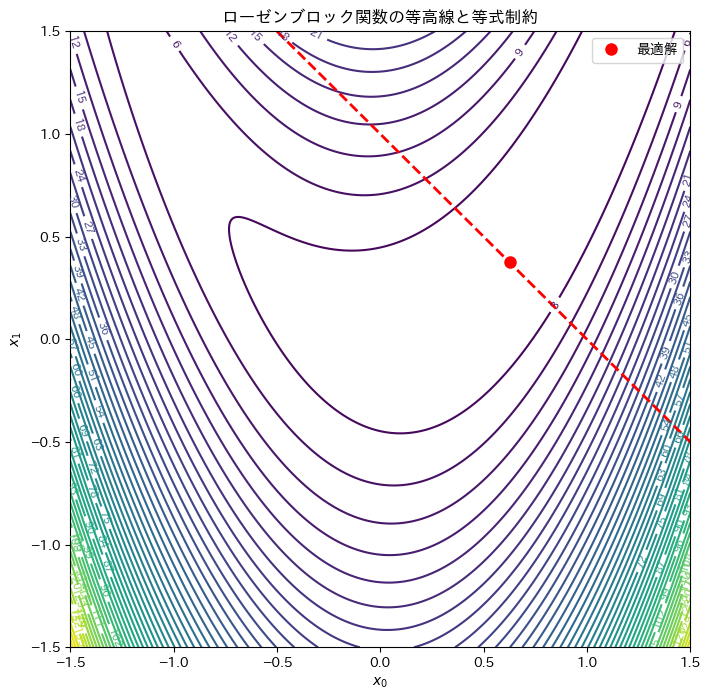

In [3]:
# 目的関数
def func_rosen(x):
    return (x[0] - 1)**2 + 10 * (x[0]**2 - x[1])**2
# 等式制約
def h_eq(x):
    return np.array([x[0] + x[1] - 1])

# 拡張ラグランジュ法で最適化
from code7_2 import * # 拡張ラグランジュ法(アルゴリズム7.3) のコードを読み込み
x_0 = np.array([0, 0])
mu_0 =  np.array([0])
x_opt = ALagrangian_method(func_rosen, h_eq, x_0, mu_0)

# グリッド作成
x0_vals = np.linspace(-1.5, 1.5, 500)
x1_vals = np.linspace(-1.5, 1.5, 500)
x0_grid, x1_grid = np.meshgrid(x0_vals, x1_vals)

# 目的関数の値
f_values = func_rosen([x0_grid, x1_grid])

# 等式制約の値
h_values = h_eq([x0_grid, x1_grid])[0]
# プロット
plt.figure(figsize=(8, 8))
# 等高線プロット（目的関数）
contours = plt.contour(x0_grid, x1_grid, f_values, levels=50, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)
# 等式制約の線
plt.contour(x0_grid, x1_grid, h_values, levels=[0], colors="red", linestyles="dashed", linewidths=2)
# 最適解のプロット
plt.plot(x_opt[0], x_opt[1], 'ro', markersize=8, label="最適解")
# 軸ラベルとタイトル
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.title("ローゼンブロック関数の等高線と等式制約")
# 凡例
plt.legend(loc="upper right")
# グラフの表示
plt.show()

# SQP法

以下の２種類の最適化問題を考える

制約付き最適化問題 1: HS100-like (制約付き二次)
$$
\begin{array}{|ll}
\text{目的関数}&f(x_1,x_2) = (x_1 - 1)^2 + (x_2 - 2)^2 \quad\to\text{最小化}\\
\text{制約条件} 
& g_1(x) = x_1^2 + x_2^2 - 4 \le 0,\\
& g_2(x) = (x_1 - 1)^2 + (x_2 - 1)^2 - 1 \le 0.
\end{array}
$$
制約付き最適化問題 2: 制約付きローゼンブロック関数
$$
\begin{array}{|ll}
\text{目的関数}&f(x_1,x_2) = 100\bigl(x_2 - x_1^2\bigr)^2 + (1 - x_1)^2 \quad\to\text{最小化}\\
\text{制約条件} 
& g_1(x) = (x_1 - 1)^3 - x_2 + 1 \le 0,\\
& g_2(x) = x_1 + x_2 - 2 \le 0.
\end{array}
$$

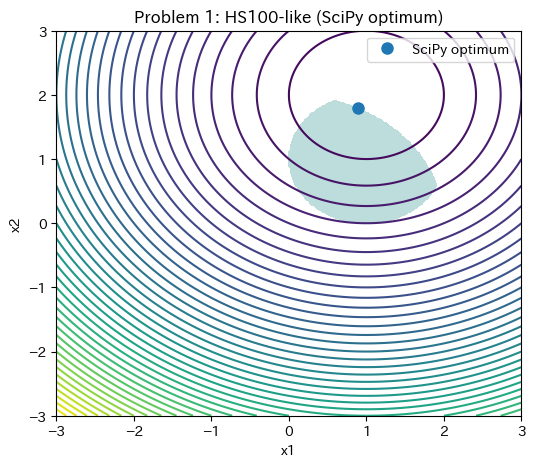

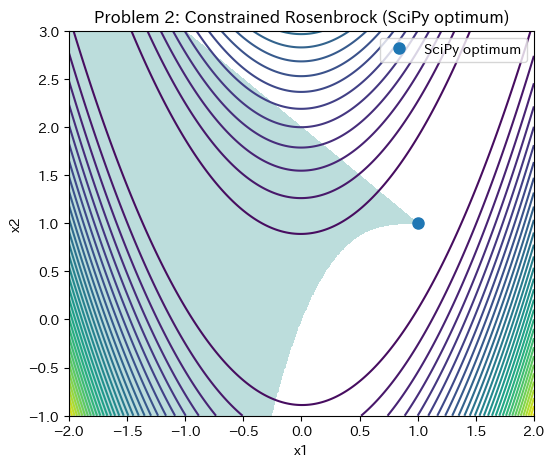

In [4]:
# =========================================================
# Problem 1: HS100-like (制約付き二次)
# =========================================================

def hs100_f(x):
    x1, x2 = x
    return (x1 - 1)**2 + (x2 - 2)**2
def hs100_g(x):
    x1, x2 = x
    g1 = x1**2 + x2**2 - 4
    g2 = (x1 - 1)**2 + (x2 - 1)**2 - 1
    return np.array([g1, g2])
def hs100_nab_f(x):
    x1, x2 = x
    return np.array([2*(x1-1), 2*(x2-2)])
def hs100_nab_g(x):
    x1, x2 = x
    return np.array([
        [2*x1, 2*x2],
        [2*(x1-1), 2*(x2-1)]
    ]).T
# SciPy 用 constraints（SciPy は >=0 を想定）
cons1 = [
    {"type": "ineq",
     "fun": lambda x: -hs100_g(x)[0],
     "jac": lambda x: -hs100_nab_g(x).T[0]},
    {"type": "ineq",
     "fun": lambda x: -hs100_g(x)[1],
     "jac": lambda x: -hs100_nab_g(x).T[1]},
]
res1 = optimize.minimize(hs100_f, x0=np.array([0.0, 0.0]),
                jac=hs100_nab_f,
                constraints=cons1,
                method="SLSQP")

x1_opt1, x2_opt1 = res1.x

# --- Plot Problem 1 ---
X, Y = np.meshgrid(np.linspace(-3,3,400), np.linspace(-3,3,400))
Z = hs100_f((X, Y))
G1 = X**2 + Y**2 - 4
G2 = (X-1)**2 + (Y-1)**2 - 1
feas = (G1<=0) & (G2<=0)
plt.figure(figsize=(6,5))
plt.contour(X,Y,Z,levels=40)
plt.contourf(X,Y,feas,levels=[0.5,1],alpha=0.3)
plt.plot(x1_opt1, x2_opt1, 'o', markersize=8, label="SciPy optimum")
plt.xlabel("x1"); plt.ylabel("x2")
plt.title("Problem 1: HS100-like (SciPy optimum)")
plt.legend()
plt.show()


# =========================================================
# Problem 2: Constrained Rosenbrock
# =========================================================
def rosen_f(x):
    x1, x2 = x
    return 100*(x2 - x1**2)**2 + (1-x1)**2
def rosen_g(x):
    x1, x2 = x
    return np.array([
        (x1 - 1)**3 - x2 + 1,
        x1 + x2 - 2
    ])
def rosen_nab_f(x):
    x1, x2 = x
    df1 = -400*x1*(x2 - x1**2) - 2*(1-x1)
    df2 = 200*(x2 - x1**2)
    return np.array([df1, df2])
def rosen_nab_g(x):
    x1, x2 = x
    return np.array([
        [3*(x1-1)**2, -1],
        [1, 1]
    ]).T
cons2 = [
    {"type": "ineq",
     "fun": lambda x: -rosen_g(x)[0],
     "jac": lambda x: -rosen_nab_g(x).T[0]},
    {"type": "ineq",
     "fun": lambda x: -rosen_g(x)[1],
     "jac": lambda x: -rosen_nab_g(x).T[1]},
]
res2 = optimize.minimize(rosen_f, x0=np.array([0.5, 1.5]),
                jac=rosen_nab_f,
                constraints=cons2,
                method="SLSQP")
x1_opt2, x2_opt2 = res2.x
# --- Plot Problem 2 ---
X, Y = np.meshgrid(np.linspace(-2,2,400), np.linspace(-1,3,400))
Z = rosen_f((X, Y))
G1 = (X - 1)**3 - Y + 1
G2 = X + Y - 2
feas2 = (G1<=0) & (G2<=0)

plt.figure(figsize=(6,5))
plt.contour(X,Y,Z,levels=40)
plt.contourf(X,Y,feas2,levels=[0.5,1],alpha=0.3)
plt.plot(x1_opt2, x2_opt2, 'o', markersize=8, label="SciPy optimum")
plt.xlabel("x1"); plt.ylabel("x2")
plt.title("Problem 2: Constrained Rosenbrock (SciPy optimum)")
plt.legend()
plt.show()


In [5]:
from code7_4 import * # SQP法（アルゴリズム 7.4）のコードを読み込み

In [6]:
# 等式制約はないので、０を返すダミーを作る
def h_null(x):
    return np.array([0])
def nab_h_null(x):
    return np.array([[0, 0]]).T
x_0 = np.array([0, 0])
x_opt = SQP(hs100_f,hs100_g, h_null, hs100_nab_f, hs100_nab_g, nab_h_null, x_0)

iter =  1 , f(x) =  5.0 , g(x) =  [16.  9.] , h(x) =  [0] , 
 x =  [2. 4.] , lambda =  [0. 0.] , mu =  [0.]
iter =  2 , f(x) =  4.930380657631324e-32 , g(x) =  [1. 0.] , h(x) =  [0] , 
 x =  [1. 2.] , lambda =  [0. 0.] , mu =  [0.]
iter =  3 , f(x) =  0.04999999999999993 , g(x) =  [ 0.05 -0.35] , h(x) =  [0] , 
 x =  [0.9 1.8] , lambda =  [0.1 0. ] , mu =  [0.]
iter =  4 , f(x) =  0.05570987654320986 , g(x) =  [ 1.54320988e-04 -3.66512346e-01] , h(x) =  [0] , 
 x =  [0.89444444 1.78888889] , lambda =  [0.11790123 0.        ] , mu =  [0.]
iter =  5 , f(x) =  0.05572808982516199 , g(x) =  [ 1.48837831e-09 -3.66563146e-01] , h(x) =  [0] , 
 x =  [0.89442719 1.78885438] , lambda =  [0.11803399 0.        ] , mu =  [0.]


In [7]:
x_0 = np.array([0.5, 1.5])
x_opt = SQP(rosen_f,rosen_g, h_null, rosen_nab_f, rosen_nab_g, nab_h_null, x_0)

iter =  1 , f(x) =  16.6801332778009 , g(x) =  [-0.14577259  0.        ] , h(x) =  [0] , 
 x =  [0.85714286 1.14285714] , lambda =  [285.87755102  36.23469388] , mu =  [0.]
iter =  2 , f(x) =  0.027101386175049844 , g(x) =  [-0.00549467  0.        ] , h(x) =  [0] , 
 x =  [0.99450549 1.00549451] , lambda =  [179.25652095 162.38053979] , mu =  [0.]
iter =  3 , f(x) =  9.914657018260643e-11 , g(x) =  [-3.31723699e-07  0.00000000e+00] , h(x) =  [0] , 
 x =  [0.99999967 1.00000033] , lambda =  [1.80496284 1.64778778] , mu =  [0.]
iter =  4 , f(x) =  0.0 , g(x) =  [0. 0.] , h(x) =  [0] , 
 x =  [1. 1.] , lambda =  [3.28664785e-06 2.92211631e-06] , mu =  [0.]


# 主双対内点法

In [8]:
# 非線形計画の例を作る

## 線形計画問題も解いてみる
$$
\begin{array}{|ll}
\text{目的関数}&f(x) = c^\top x \quad\to\text{最小化}\\
\text{制約条件} 
& h(x) = Ax - b = 0,\ x\ge0.
\end{array}
$$
(不等式制約の場合はスラック変数を入れる)

In [9]:
# 目的関数、制約条件、勾配などの関数（仮に定義）
def f_obj(x):
    return -5*x[0]-4*x[1]
def f_grad(x):
    return np.array([-5,-4,0 , 0])
A = np.array([[5, 2, 1, 0],
             [1, 2, 0, 1]])
b = np.array([30,14])
def h_eq(x):
    return A@x-b
def h_grad(x):
    return A.T

from code7_5 import * # 主双対内点法（アルゴリズム 7.8）のコードを読み込み
x0 = np.random.rand(4)
x0 /= np.sum(x0)/2
PDIP(f_obj, h_eq, f_grad, h_grad,x0)

目的関数値: -40.00
KKT条件のノルム: 1.66e-12



(array([3.99999995e+00, 4.99999987e+00, 5.08626292e-07, 3.05175775e-07]),
 array([0.75000001, 1.25000002]),
 array([9.53674329e-08, 7.62939473e-08, 7.50000014e-01, 1.25000002e+00]))